In [112]:
using Pkg
Pkg.add("DataInterpolations")
Pkg.add("DifferentialEquations")
Pkg.add("RegularizationTools")
Pkg.add("Optim")
Pkg.add("Plots") 

   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.

In [113]:
using DataInterpolations
using Plots
using ForwardDiff
using StableRNGs
using Pkg
using Optim
using RegularizationTools

Adding data points and testing with cubic spline, akima interpolation, linear interpolation, quadratic interpolation, cubic hermite spline

In [114]:
# @show u = rand(5)
# t = 0:5
# interp = LinearInterpolation(u, t)
# @show interp(3.5) # Gives the linear interpolation value at t=3.5

# t′ = 0.5:1.0:3.5
# @show interp(t′)

# u′ = similar(u, length(t′))
# @show interp(u′, t′)

In [115]:
n = 10

u = rand(n)
t = 0:n-1

t_new = 0:0.001:n-1

# u = [14.7, 11.51, 10.41, 14.95, 12.24, 11.22]
# t = [0.0, 62.25, 109.66, 162.66, 205.8, 252.3]

# t_new = 0:0.1:252

0.0:0.001:9.0

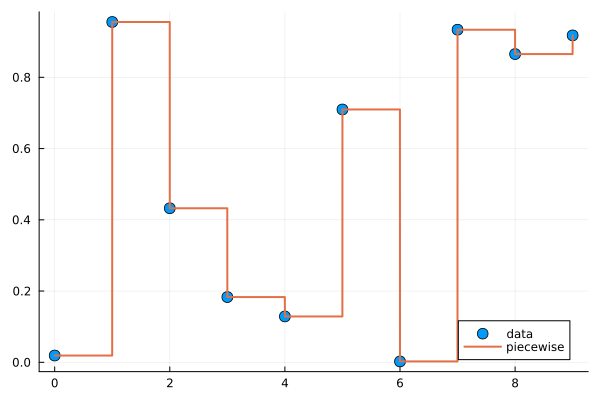

In [116]:
ci = ConstantInterpolation(u,t; extrapolation = ExtrapolationType.Extension)

u_new = ci.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="piecewise")

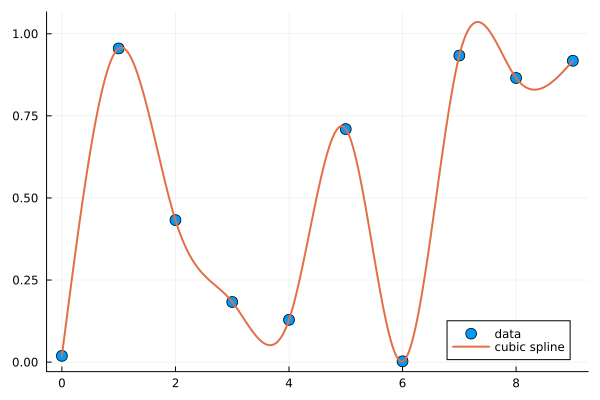

In [117]:
cub = CubicSpline(u, t; extrapolation = ExtrapolationType.Extension)

u_new = cub.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="cubic spline")

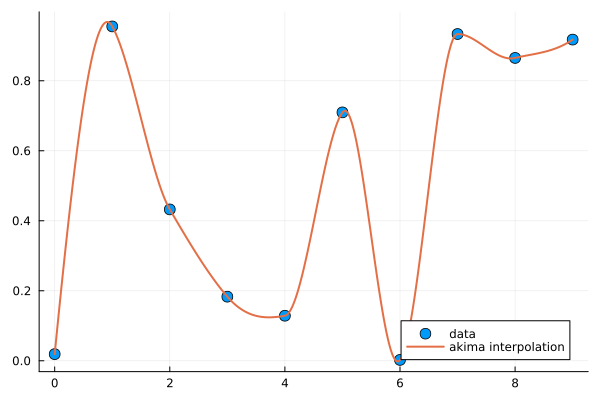

In [118]:
aki = AkimaInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = aki.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="akima interpolation")

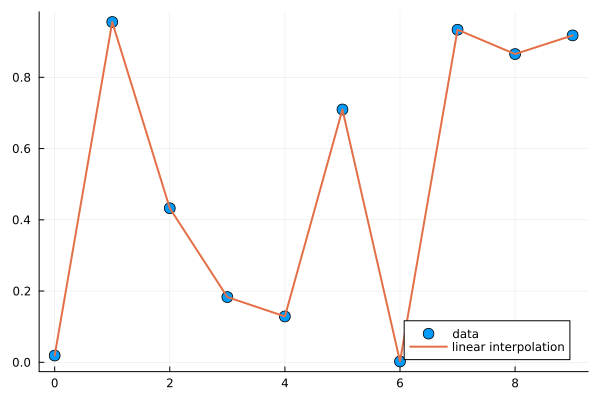

In [119]:
lin = LinearInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = lin.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="linear interpolation")

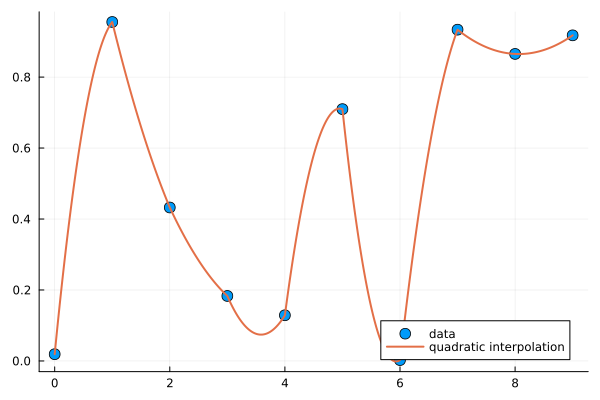

In [120]:
quad = QuadraticInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = quad.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="quadratic interpolation")

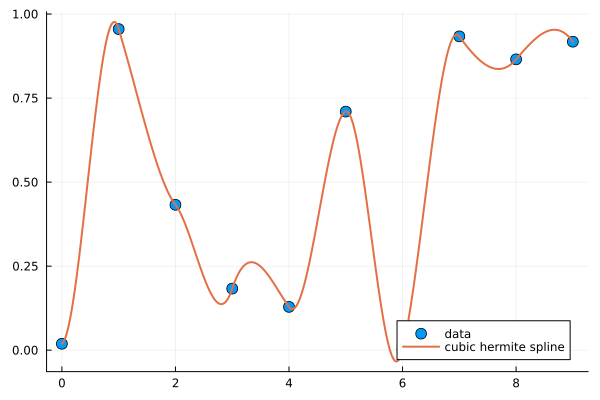

In [121]:
idx = (t .- t[1]) ./ (t[2] - t[1]) .+ 1

f(x) = cub(x)

du_didx = ForwardDiff.derivative.(f, idx)

dt = t[2] - t[1]
du = du_didx ./ dt

chs = CubicHermiteSpline(du, u, t; extrapolation = ExtrapolationType.Extension)

u_new = chs.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="cubic hermite spline")

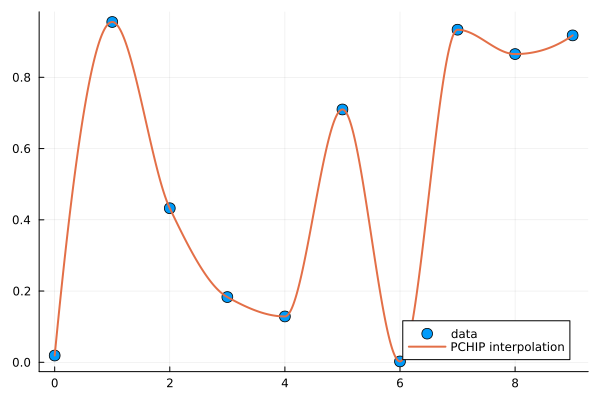

In [122]:
PCHIP = PCHIPInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = PCHIP.((t_new .- t[1]))

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="PCHIP interpolation")

In [123]:
du2 = [-0.047, -0.058, 0.054, 0.012, -0.068, 0.0]
u2 = [14.7, 11.51, 10.41, 14.95, 12.24, 11.22]
t2 = [0.0, 62.25, 109.66, 162.66, 205.8, 252.3]

t2_new = 0:1:252

0:1:252

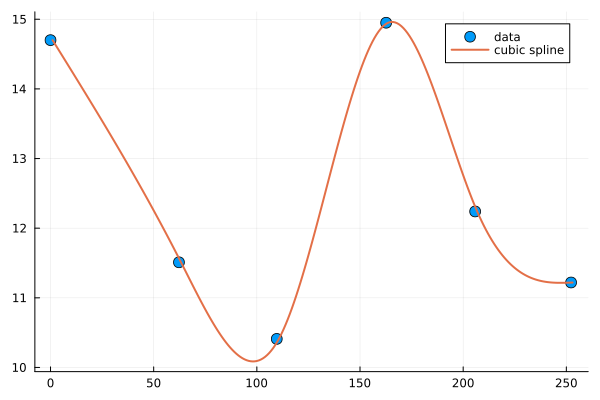

In [124]:
cub2 = CubicSpline(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = cub2.((t2_new .- t2[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="cubic spline")

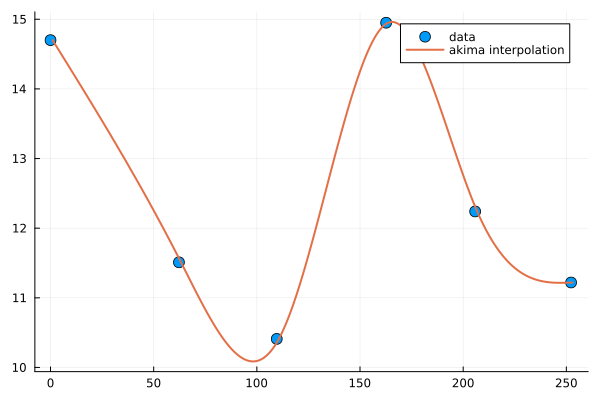

In [125]:
aki2 = AkimaInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u_new2 = aki2.((t2_new .- t2[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="akima interpolation")

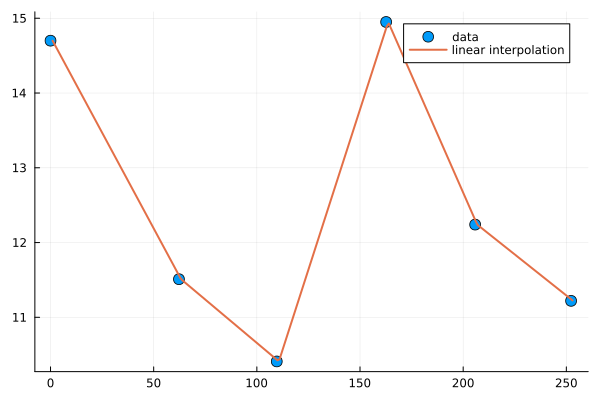

In [126]:
lin2 = LinearInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = lin2.((t2_new .- t2[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="linear interpolation")

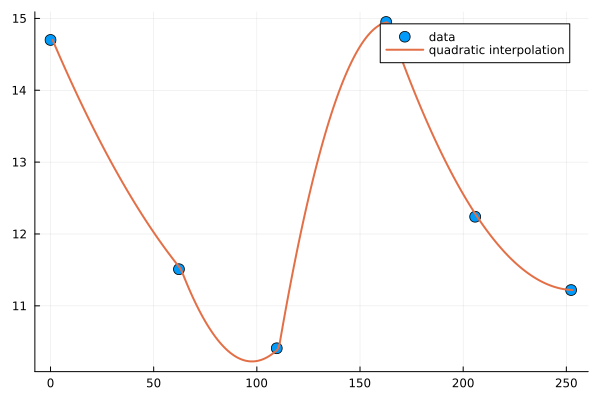

In [127]:
quad2 = QuadraticInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = quad2.((t2_new .- t2[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="quadratic interpolation")

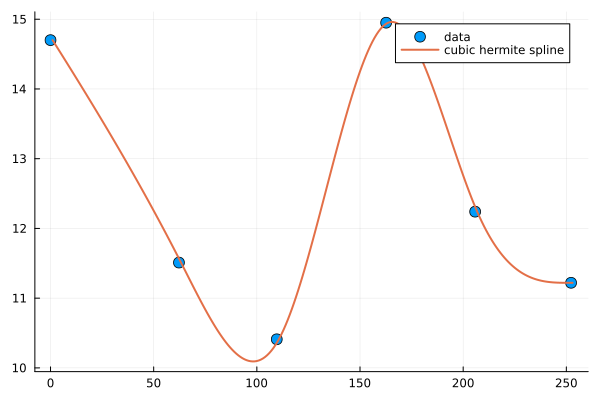

In [128]:
chs2 = CubicHermiteSpline(du2, u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = chs2.((t2_new .- t2[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="cubic hermite spline")

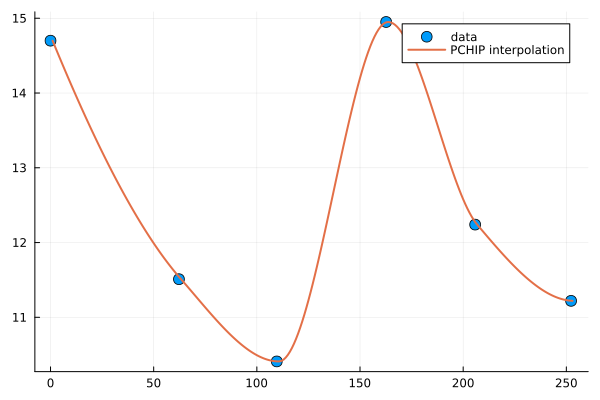

In [129]:
PCHIP2 = PCHIPInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = PCHIP2.((t2_new .- t[1]))

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="PCHIP interpolation")

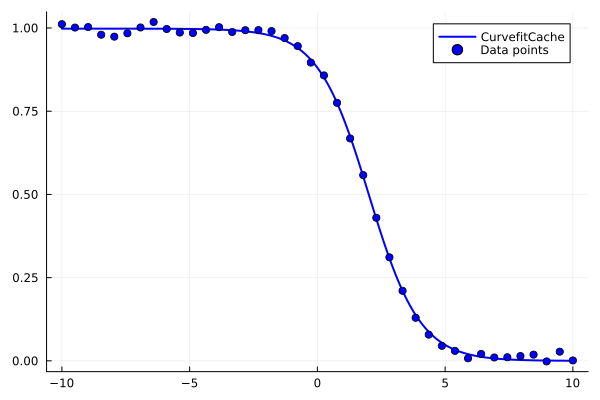

In [130]:
rng = StableRNG(4)
model(x, p) = @. p[1] / (1 + exp(x - p[2]))
t3 = range(-10, stop = 10, length = 40)
u3 = model(t3, [1.0, 2.0]) + 0.01 * randn(rng, length(t3))
p0 = [0.5, 0.5]

A = Curvefit(u3, t3, model, p0, LBFGS())

plot(A, linewidth=2)

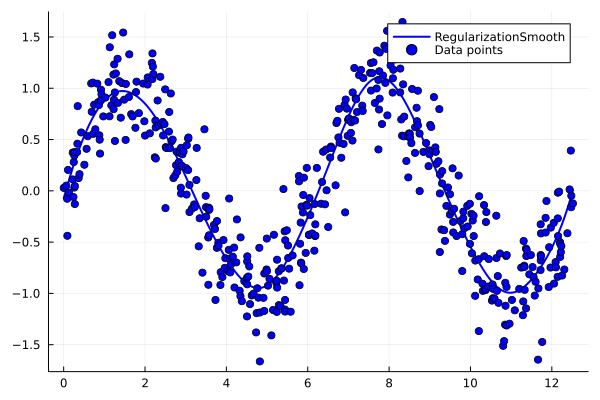

In [131]:
npts =10000
xmin = 0.0
xspan = 4 * π
x = collect(range(xmin, xmin + xspan, length = npts))
rng = StableRNG(655)
x = x + xspan / npts * (rand(rng, npts) .- 0.5)
# select a subset randomly
idx = unique(rand(rng, collect(eachindex(x)), 500))
t = x[unique(idx)]
npts = length(t)
ut = sin.(t)
stdev = .3 * maximum(ut)
u = ut + stdev * randn(rng, npts)
# data must be ordered if t̂ is not provided
idx = sortperm(t)
tₒ = t[idx]
uₒ = u[idx]


A = RegularizationSmooth(uₒ, tₒ, 4; λ = 1e-2, alg = :fixed)

plot(A, linewidth=2)

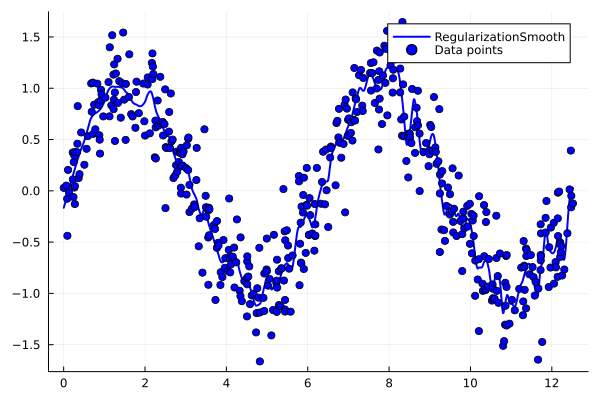

In [132]:
# A = RegularizationSmooth(uₒ, tₒ, nothing, :midpoint)
A = RegularizationSmooth(uₒ, tₒ, nothing, collect(1:npts); λ = 0.05, alg = :fixed)

plot(A, linewidth=2)

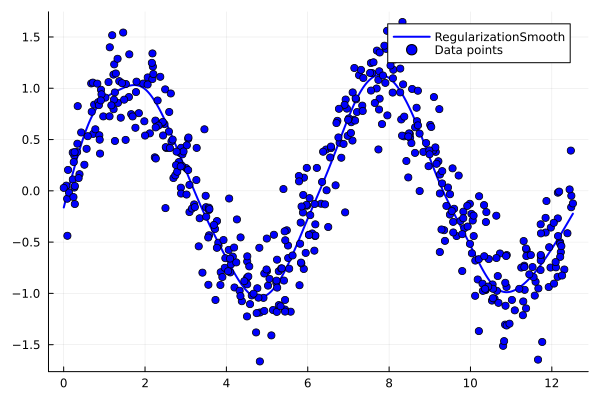

In [133]:
N̂ = 20
t̂ = collect(range(xmin, xmin + xspan, length = N̂))
nhalf = Int(floor(npts / 2))
wls = vcat(ones(nhalf), 10 * ones(npts - nhalf))
wr = collect(1:(N̂ - 2))
A = RegularizationSmooth(u, t, t̂, wls, wr)

plot(A, linewidth=2)

One nice feature of DataInterpolations is that it can integrate easily into the DifferentialEquations package. 

Imagine: You have discrete data points from sensors, which represent an ODE problem. You want to be able to easily take your data and use it to model the system. 

Example situations: 
* temperature dependent chemical reactions
* population modeling with seasonal birthrates


In [134]:
using DifferentialEquations
import CommonSolve: solve   

# Monthly birth rate data
months = [0.0, 3.0, 6.0, 9.0, 12.0]
birth_rates = [0.05, 0.08, 0.10, 0.07, 0.05]  # births per capita

b_interp = LinearInterpolation(birth_rates, months)

# dP/dt = b(t)*P - d*P
function population!(du, u, p, t)
    d = p[1]
    P = u[1]
    
    du[1] = (b_interp(t) - d) * P
end

prob = ODEProblem(population!, [1000.0], (0.0, 12.0), [0.03])
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 7-element Vector{Float64}:
  0.0
  0.21867245852312106
  1.894114379297257
  5.07356456587262
  7.470483109600028
  9.936288695877291
 12.0
u: 7-element Vector{Vector{Float64}}:
 [1000.0]
 [1004.6231915161931]
 [1057.4080044964817]
 [1250.46839307855]
 [1459.7442831277424]
 [1625.6830618686308]
 [1718.4086298880156]